In [449]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


In [450]:
#загружаем картинку
src = cv2.imread("C:\\Users\\user\\Desktop\\im_cv\\lena.png")

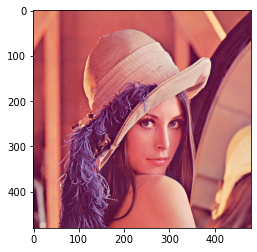

In [451]:
#вывод исходной картинки 
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))

In [452]:
face_cascade = cv2.CascadeClassifier("C:\\anaconda\\pkgs\\libopencv-4.0.1-hbb9e17c_0\\Library\\etc\\haarcascades\\haarcascade_frontalface_default.xml")
_,_,channels = src.shape
if channels==4:
    gray = cv2.cvtColor(src, cv2.COLOR_BGRA2GRAY)
else:
    gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)


In [453]:
#находим лицо
faces = face_cascade.detectMultiScale(gray, 1.1, 4)

In [454]:
crop = image[faces[0][1]:faces[0][1] + faces[0][3],
             faces[0][0]:faces[0][0] + faces[0][2]]


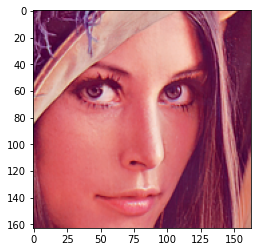

In [455]:
plt.imshow(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))

In [456]:
#применияем фильтр Кенни и подбираем пороговые значения, переводя исходное изображение в оттенки серого
grayval = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(grayval, 70, 140)

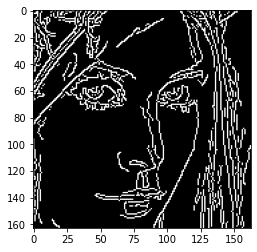

In [457]:
plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))

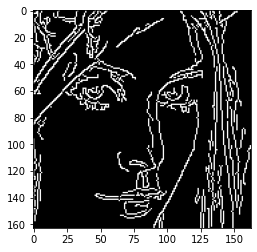

In [458]:
# убираем ненужные компоненты
# если длина и ширина найденной компоненты с определённой меткой меньше 10, то зануляем соответствующие пиксели
_, labels, stats, _ = cv2.connectedComponentsWithStats(edges, 4)
for i in range(0,edges.shape[1]):
    for j in range(0,edges.shape[0]):
        if stats[labels[i, j], cv2.CC_STAT_WIDTH] <= 10 and stats[labels[i, j], cv2.CC_STAT_HEIGHT] <= 10:
            edges[i, j] = 0
plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))
   

In [459]:
#задаём ядро
kernel = numpy.array([[0, 0, 1, 0, 0],[0, 1, 1, 1, 0],[1, 1, 1, 1, 1],[0, 1, 1, 1, 0],[0, 0, 1, 0, 0],], dtype=numpy.uint8)

In [460]:
#применяем ядро для расширения
dilay = cv2.dilate(edges, kernel)

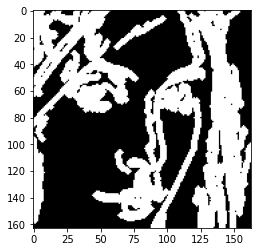

In [461]:
plt.imshow(cv2.cvtColor(dilay , cv2.COLOR_BGR2RGB))

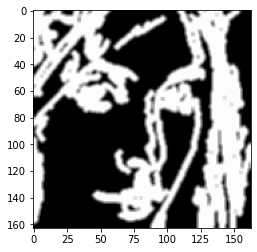

In [462]:
#фильтр Гаусса с дефолтными параметрами
GausBlur= cv2.GaussianBlur(dilated, (3, 3), cv2.BORDER_DEFAULT)
plt.imshow(cv2.cvtColor(GausBlur, cv2.COLOR_BGR2RGB))

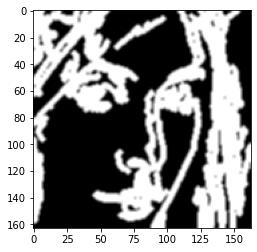

In [463]:
#нормируем
normalized = cv2.normalize(blurred, None, 0, 1, cv2.NORM_MINMAX, cv2.CV_32F)
plt.imshow(cv2.cvtColor(normalized , cv2.COLOR_BGR2RGB))

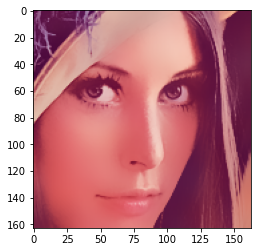

In [464]:
#билатеральный фильтр
bilateral = cv2.bilateralFilter(crop, 20, 70, 70)
plt.imshow(cv2.cvtColor(bilateral , cv2.COLOR_BGR2RGB))

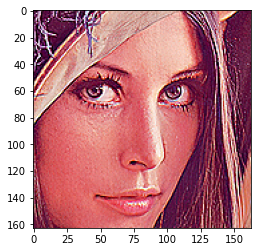

In [465]:
kernel = numpy.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
sharp = cv2.filter2D(cropped, -1, kernel)
plt.imshow(cv2.cvtColor(sharp , cv2.COLOR_BGR2RGB))

In [466]:
#примеяем несколько фильтров
res = numpy.zeros(crop.shape, dtype=numpy.uint8)
for x in range(result.shape[1]):
    for y in range(result.shape[0]):
        for k in range(result.shape[2]):
            res[x, y, k] = normalized[x, y] * sharp[x, y, k] + \
                (1 - normalized[x, y]) * bilateral[x, y, k]

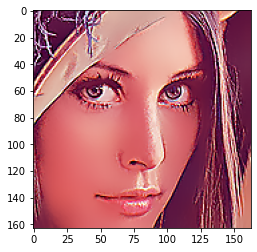

In [467]:
plt.imshow(cv2.cvtColor(result , cv2.COLOR_BGR2RGB))